#                            AMAZON SALES ANALYSIS 2019

In [78]:
#Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [26]:
#Importing dataset
files= ( file for file in os.listdir(r'C:\Users\HP\Downloads\amazon_dataset'))

In [27]:
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [29]:
# Merged every month files
path=r'C:\Users\HP\Downloads\amazon_dataset'
files= ( file for file in os.listdir(r'C:\Users\HP\Downloads\amazon_dataset'))
all_data=pd.DataFrame()
for file in files:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
    
all_data.shape

(560550, 6)

In [30]:
all_data.to_csv(r'C:\Users\HP\Downloads\amazon_dataset\all_data.csv',index=False)

In [31]:
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Preparation: Finding Nulls ,Duplicates

In [32]:
all_data.isnull().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [33]:
all_data=all_data.dropna(how='all')

In [34]:
all_data.shape

(558915, 6)

In [35]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [38]:
'04/19/19 08:46' .split('/')[0]

'04'

In [39]:
def month(x):
    return x.split('/')[0]

In [41]:
all_data['month']=all_data['Order Date'].apply(month)

In [42]:
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [43]:
all_data.duplicated().sum()

373228

In [45]:
all_data=all_data.drop_duplicates()

In [46]:
all_data.duplicated().sum()

0

In [47]:
all_data.shape

(185687, 7)

# Find best month for sale?

In [92]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
sales               float64
dtype: object

In [93]:
all_data['month']=all_data['month'].astype(int)

In [94]:
all_data['month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [95]:
filter=all_data['month']=='Order Date'
all_data=all_data[~filter]
all_data.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99


In [96]:
all_data['month']=all_data['month'].astype(int)

In [97]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
sales               float64
dtype: object

In [86]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [87]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [88]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [89]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [90]:
all_data.groupby('month')['sales'].sum()

month
1     1.821413e+06
2     2.200078e+06
3     2.804973e+06
4     3.389218e+06
5     3.150616e+06
6     2.576280e+06
7     2.646461e+06
8     2.241083e+06
9     2.094466e+06
10    3.734778e+06
11    3.197875e+06
12    4.608296e+06
Name: sales, dtype: float64

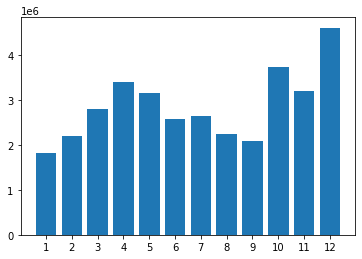

In [91]:
month=range(1,13)
plt.bar(month,all_data.groupby('month')['sales'].sum())
plt.xticks(month)
plt.xlabel='month'
plt.ylabel='sales_in_usd'

### Highest selling Month : December 

# Which product  was sold most ?

<AxesSubplot:xlabel='Product'>

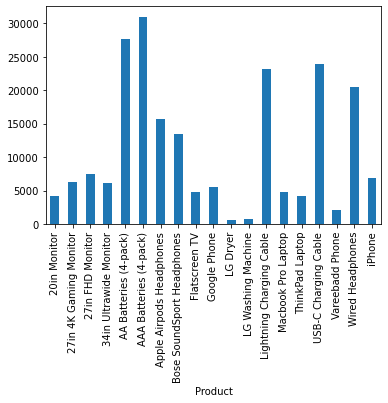

In [77]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

### highest selling product  is  AA Batteries(4-Pack)